# MyGrADS

This is a collection of functions implemented in python that replicate
their implementation in GrADS.
Content:
1. Centered Differences (cdifof)
2. Horizontal Divergence (hdivg)
3. Vertical component of the relative vorticity (hcurl)
4. Horizontal Advection (tadv) 

Only requires Numpy.
In this example, we use Xarray to read in the nc files, Matplotlib and Cartopy for plotting.

## Usual Imports

In [3]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Import MyGrADS

In [4]:
import sys
sys.path.append('/home/zmaw/u241292/scripts/python/mygrads')
import mygrads as mg

## Read Some Data

In [5]:
# We are using some sample data downloaded from the NCEP Reanalysis 2
# Downloaded from: https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.html
ds   = xr.open_dataset('data/u.nc')
u    = ds['uwnd'][0,0,:,:].values
lat  = ds['lat'].values
lon  = ds['lon'].values
ds   = xr.open_dataset('data/v.nc')
v    = ds['vwnd'][0,0,:,:].values
ds   = xr.open_dataset('data/t.nc')
t    = ds['air'][0,0,:,:].values

## Calculations

### Horizontal Divergence

$
\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}
$

In [6]:
div = mg.hdivg(u,v,lat,lon)

### Relative Vorticity (vertical component of)

$
\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}
$

In [7]:
vort = mg.hcurl(u,v,lat,lon)

### Temperature Advection

$
u\frac{\partial T}{\partial x}+v\frac{\partial T}{\partial y}
$

In [8]:
tadv = mg.hadv(u,v,t,lat,lon)

## Plot

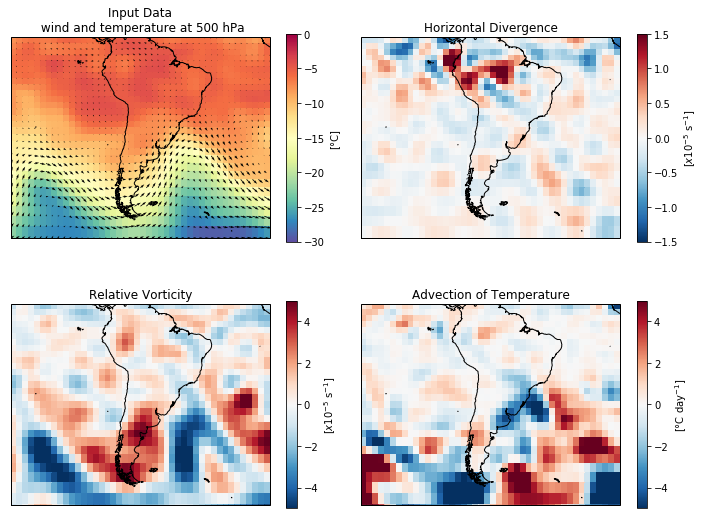

In [30]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(2,2,1,projection=ccrs.Mercator())
ax.set_extent([-120, -10, -60, 10], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')     
mesh = ax.pcolormesh(lon, lat,t-273.5,
                     vmin=-30,vmax=0,
                     transform=ccrs.PlateCarree(), cmap="Spectral_r")
cbar=plt.colorbar(mesh, shrink=0.75,label='[°C]')
q = ax.quiver(lon, lat, u, v, minlength=0.1, scale_units='xy',scale=0.0001,
              transform=ccrs.PlateCarree(), color='k',width=0.003)
plt.title('Input Data\n wind and temperature at 500 hPa')

ax = fig.add_subplot(2,2,2,projection=ccrs.Mercator())
ax.set_extent([-120, -10, -60, 10], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')     
mesh = ax.pcolormesh(lon, lat, div*100000,
                     vmin=-1.5,vmax=1.5,
                     transform=ccrs.PlateCarree(), cmap="RdBu_r")
cbar=plt.colorbar(mesh, shrink=0.75,label='[$x10^{-5}$ s$^{-1}$]')
# q = ax.quiver(lon, lat, u, v, minlength=0.1, scale_units='xy',scale=0.0001,
#               transform=ccrs.PlateCarree(), color='k',width=0.003)
plt.title('Horizontal Divergence')

ax = fig.add_subplot(2,2,3,projection=ccrs.Mercator())
ax.set_extent([-120, -10, -60, 10], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')     
mesh = ax.pcolormesh(lon, lat, vort*100000,
                     vmin=-5,vmax=5,
                     transform=ccrs.PlateCarree(), cmap="RdBu_r")
cbar=plt.colorbar(mesh, shrink=0.75,label='[$x10^{-5}$ s$^{-1}$]')
# q = ax.quiver(lon, lat, u, v, minlength=0.1, scale_units='xy',scale=0.0001,
#               transform=ccrs.PlateCarree(), color='k',width=0.003)
plt.title('Relative Vorticity')

ax = fig.add_subplot(2,2,4,projection=ccrs.Mercator())
ax.set_extent([-120, -10, -60, 10], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')     
mesh = ax.pcolormesh(lon, lat, tadv*84600,
                     vmin=-5,vmax=5,
                     transform=ccrs.PlateCarree(), cmap="RdBu_r")
cbar=plt.colorbar(mesh, shrink=0.75,label='[°C day$^{-1}$]')
# q = ax.quiver(lon, lat, u, v, minlength=0.1, scale_units='xy',scale=0.0001,
#               transform=ccrs.PlateCarree(), color='k',width=0.003)
plt.title('Advection of Temperature')

plt.tight_layout()
fig.savefig('example.png', dpi=300)